## Porbabilistic Modelling Rejection Sampling

#### Importing the library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import scipy.stats as ss

#### Defining the bar p (unnormalized distribution)

In [16]:
n1 = ss.norm(20,10)
n2 = ss.norm(50,5)
n3 = ss.norm(80,20)
def p_bar(x):
    return n1.pdf(x) + n2.pdf(x) + n3.pdf(x)

#### Defining the proposal distribution

In [137]:
Q = ss.norm(50,30)

#### Finding M

In [153]:
M = 1
for x in range(-50,100):
    M = max(M,p_bar(x)/Q.pdf(x))

In [182]:
print("Obtained M Value is : ", M)

Obtained M Value is :  6.5203056906522505


#### Lets plot this distribution  for visulaization.

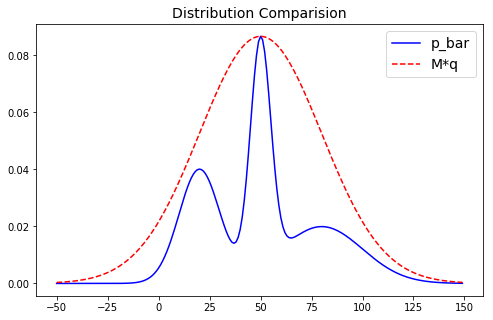

In [181]:
yps = []
yqs = []
xs = []
plt.figure(figsize = [8,5])
for x in range(-50,150):
    y_p = p_bar(x)
    y_q = M*Q.pdf(x)
    yps.append(y_p)
    yqs.append(y_q)
    xs.append(x)
plt.plot(xs,yps,'b-',label = "p_bar")
plt.plot(xs,yqs,'r--',label = "M*q")
plt.title("Distribution Comparision", fontsize = 14)
plt.legend(fontsize =14)
plt.savefig("01.png")
plt.show()

### Doing Rejection Sampling

In [174]:
rejects = []
accepts = []
for i in range(10000):
    sample = Q.rvs()
    q_lim = M*Q.pdf(sample)
    p_lim = p_bar(sample)
    epsilon = np.random.uniform(0,q_lim)
    if(epsilon > p_lim):
        rejects.append(sample)
    else:
        accepts.append(sample)

In [175]:
print("Acceptance rate is : ", len(accepts)/(len(rejects) + len(accepts)))

Acceptance rate is :  0.4668


#### Plotting the histogram.

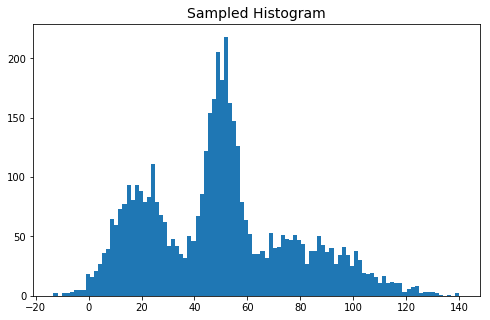

In [185]:
plt.figure(figsize = [8,5])
plt.hist(accepts, bins = 100)
plt.title("Sampled Histogram", fontsize = 14)
plt.savefig("02.png")
plt.show()

In [184]:
ratio = 3/M
print("Acceptance rate should be near : ",ratio) 

Acceptance rate should be near :  0.46010112751322535


### Thankyou by

>Abhishek Kumar

>18111002